In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

In [7]:
# 数据加载
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
data_loader = torch.utils.data.DataLoader(
    datasets.MNIST("data", train=True, download=True, transform=transform),
    batch_size=64, shuffle=True
)

In [8]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)

In [9]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 512),
            nn.ReLU(True),
            nn.Linear(512, 256),
            nn.ReLU(True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x)

In [10]:
# 实例化生成器和判别器
generator = Generator()
discriminator = Discriminator()

# 损失函数和优化器
criterion = nn.BCELoss()
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)


In [12]:
num_epochs = 50
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        # 真实图像
        real_images = images.view(images.size(0), -1)
        real_labels = torch.ones(images.size(0), 1)

        # 生成图像
        z = torch.randn(images.size(0), 128)
        fake_images = generator(z)
        fake_labels = torch.zeros(images.size(0), 1)

        # 训练判别器
        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        outputs = discriminator(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # 训练生成器
        z = torch.randn(images.size(0), 128)
        fake_images = generator(z)
        outputs = discriminator(fake_images)

        g_loss = criterion(outputs, real_labels)
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(data_loader)}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, D(x): {real_score.mean().item():.2f}, D(G(z)): {fake_score.mean().item():.2f}')

print('Training completed!')


Epoch [1/50], Step [100/938], d_loss: 0.3345, g_loss: 1.5860, D(x): 0.98, D(G(z)): 0.27
Epoch [1/50], Step [200/938], d_loss: 0.0261, g_loss: 4.7095, D(x): 0.99, D(G(z)): 0.01
Epoch [1/50], Step [300/938], d_loss: 0.9662, g_loss: 9.1754, D(x): 0.93, D(G(z)): 0.54
Epoch [1/50], Step [400/938], d_loss: 0.2335, g_loss: 9.4812, D(x): 0.97, D(G(z)): 0.14
Epoch [1/50], Step [500/938], d_loss: 4.1975, g_loss: 6.9358, D(x): 0.30, D(G(z)): 0.53
Epoch [1/50], Step [600/938], d_loss: 0.1833, g_loss: 6.2251, D(x): 0.95, D(G(z)): 0.06
Epoch [1/50], Step [700/938], d_loss: 0.5153, g_loss: 6.2764, D(x): 0.91, D(G(z)): 0.25
Epoch [1/50], Step [800/938], d_loss: 0.5038, g_loss: 12.4013, D(x): 0.86, D(G(z)): 0.08
Epoch [1/50], Step [900/938], d_loss: 0.4479, g_loss: 7.3866, D(x): 0.96, D(G(z)): 0.28
Epoch [2/50], Step [100/938], d_loss: 0.4417, g_loss: 3.4849, D(x): 0.91, D(G(z)): 0.18
Epoch [2/50], Step [200/938], d_loss: 1.0085, g_loss: 2.4406, D(x): 0.75, D(G(z)): 0.36
Epoch [2/50], Step [300/938], d

In [19]:
from matplotlib import pyplot as plt

# 固定随机噪声
fixed_z = torch.randn(64, 128)

# 生成图像
with torch.no_grad():  # 不需要梯度信息
    fake_images = generator(fixed_z)
plt.imshow(fake_images[2].detach().numpy().reshape(28, 28), cmap='gray')

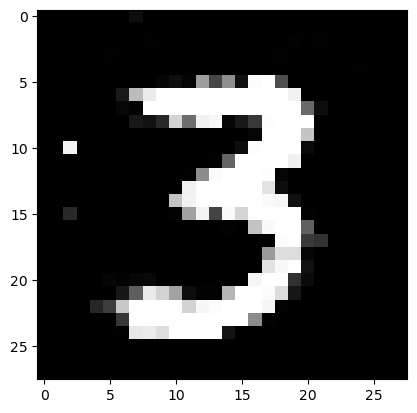

784